# Import libraries and functions

In [1]:
import numpy as np  # Importing NumPy for numerical operations
import torch  # Importing PyTorch for deep learning framework
import torch.nn as nn  # Importing neural network modules from PyTorch
import torch.nn.functional as F  # Importing functional interface from PyTorch for common operations
from torch.utils.data import Dataset, DataLoader  # Importing utilities for handling data
import os  # Importing os for operating system dependent functionality like file paths
from PIL import Image  # Importing PIL for image processing
import torchvision.transforms as transforms  # Importing transformations for image preprocessing
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import math  # Importing math for mathematical operations

# Ensure notebook be able to call functions from utils.py
import sys
sys.path.append('/kaggle/input/get-ready-to-github-conv')  # Add the directory to the system path
from utils import pad_image, extract_patches, reconstruct_image_from_patches, save_reconstructed_image, LISTA_train, save_trained_model, load_trained_model
from data import load_and_preprocess_data

# Define hyperparameters

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
normalised_size = (16, 16)  # Used for reshaping images
numEpochs = 150  # Number of training epochs
numLayers = 7  # Number of layers in the LISTA model
learning_rate = 1e-4  # Learning rate for the optimizer

# Load datasets

In [3]:
# Directory paths
clear_train_dir = '/kaggle/input/bsd500-patch-dataset-snr25/extracted_train'
clear_valid_dir = '/kaggle/input/bsd500-patch-dataset-snr25/extracted_val'
noisy_train_dir = '/kaggle/input/bsd500-patch-dataset-snr25/noisy_extracted_train'
noisy_valid_dir = '/kaggle/input/bsd500-patch-dataset-snr25/noisy_extracted_val'

# Load and preprocess data
noisy_train_images, clear_train_images, noisy_valid_images, clear_valid_images, \
noisy_train_filenames, clear_train_filenames, noisy_valid_filenames, clear_valid_filenames = load_and_preprocess_data(
    clear_train_dir, clear_valid_dir, noisy_train_dir, noisy_valid_dir)

# Convert PyTorch tensors to NumPy arrays
X1 = clear_train_images.numpy()  # Ground truth training images
Y1 = noisy_train_images.numpy()  # Noisy training images
X2 = clear_valid_images.numpy()  # Ground truth validation images
Y2 = noisy_valid_images.numpy()  # Noisy validation images

print(f'X1 has shape {X1.shape}')
print(f'Y1 has shape {Y1.shape}')
print(f'X2 has shape {X2.shape}')
print(f'Y2 has shape {Y2.shape}')


Defining transformation...
Loading and preprocessing clear training images from /kaggle/input/bsd500-patch-dataset-snr25/extracted_train...
Finished loading clear training images.
Loading and preprocessing clear validation images from /kaggle/input/bsd500-patch-dataset-snr25/extracted_val...
Finished loading clear validation images.
Loading and preprocessing noisy training images from /kaggle/input/bsd500-patch-dataset-snr25/noisy_extracted_train...
Finished loading noisy training images.
Loading and preprocessing noisy validation images from /kaggle/input/bsd500-patch-dataset-snr25/noisy_extracted_val...
Finished loading noisy validation images.
X1 has shape (768, 51200)
Y1 has shape (768, 51200)
X2 has shape (768, 2048)
Y2 has shape (768, 2048)


# Train and validate the model

There are 51200 images in the training dataset
There are 2048 images in the validation dataset


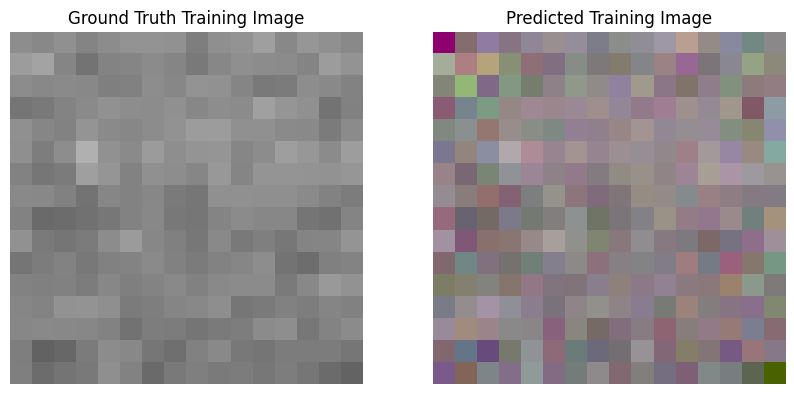

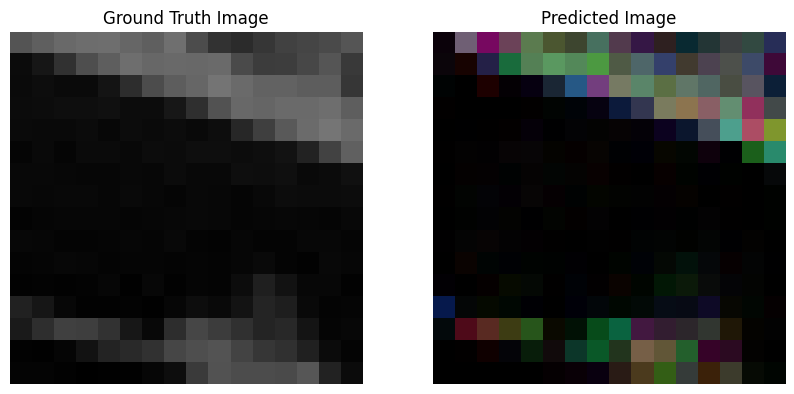

Epoch 1/150, Train Loss: 0.018285714836474655, Validation Loss: 0.002155540845564847


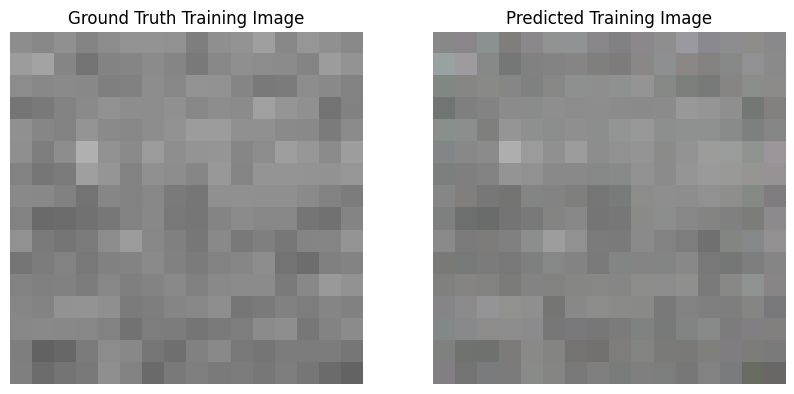

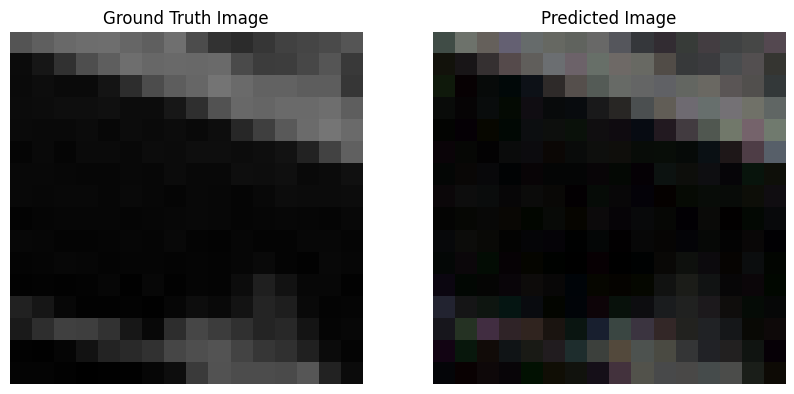

Epoch 11/150, Train Loss: 0.00019274776550446405, Validation Loss: 0.00018797466638486706


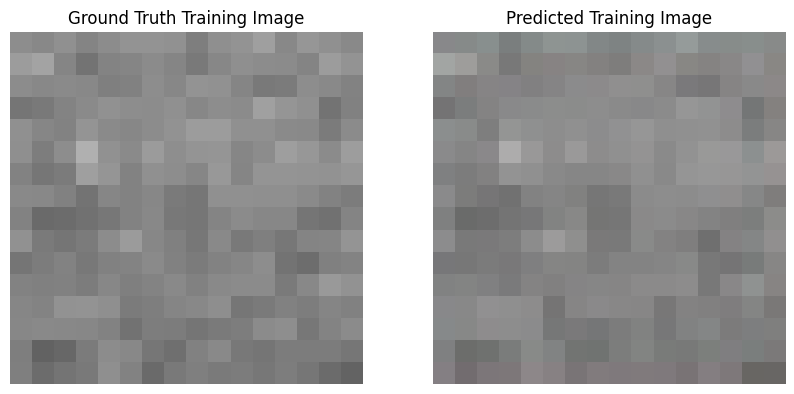

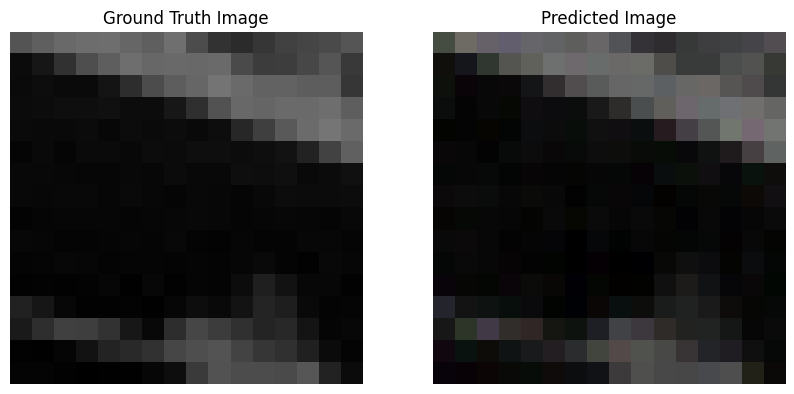

Epoch 21/150, Train Loss: 0.00015491768811273232, Validation Loss: 0.00016386394474589836


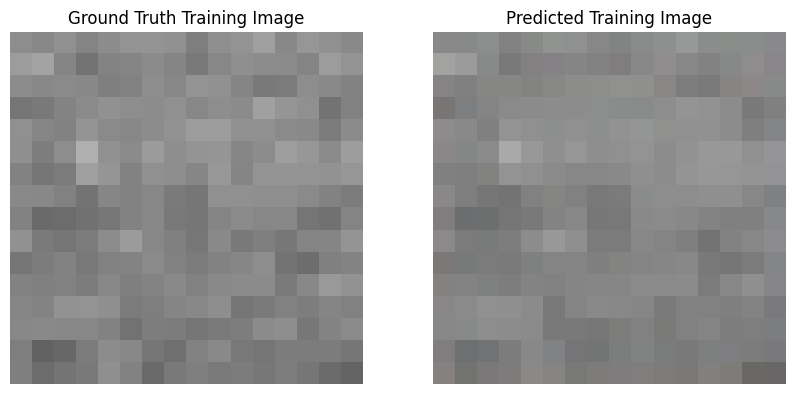

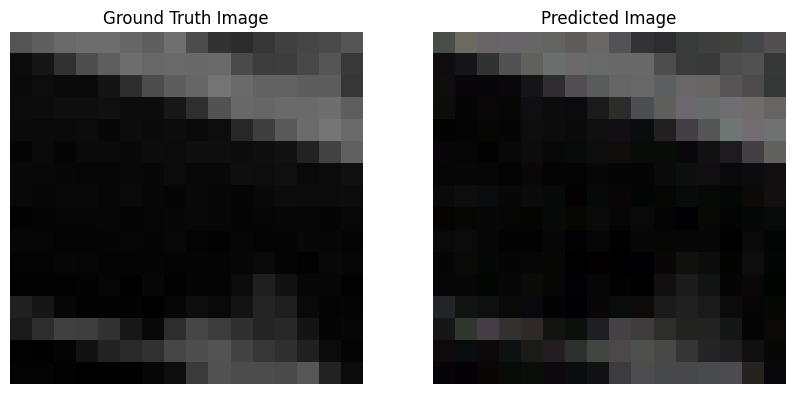

Epoch 31/150, Train Loss: 0.00014772304078860543, Validation Loss: 0.0001640339439635355


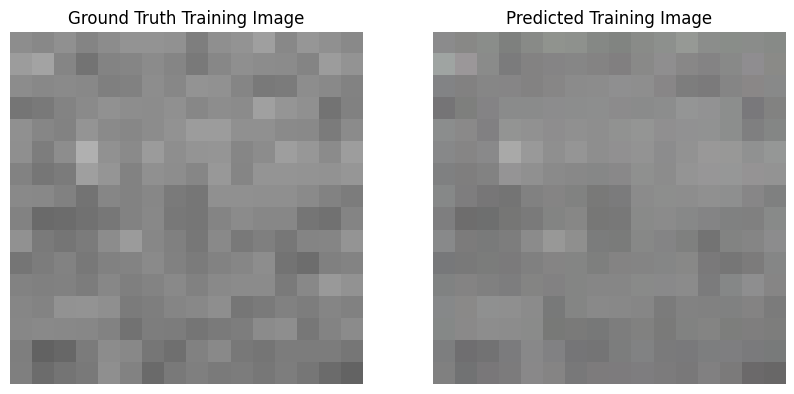

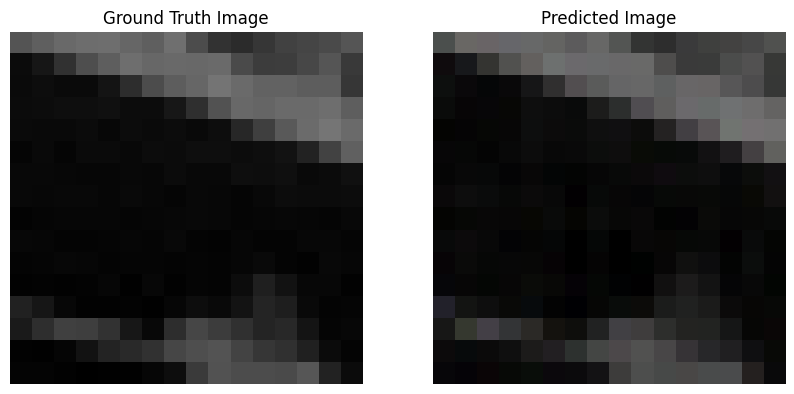

Epoch 41/150, Train Loss: 0.0001439438408880278, Validation Loss: 0.00015806662270830926


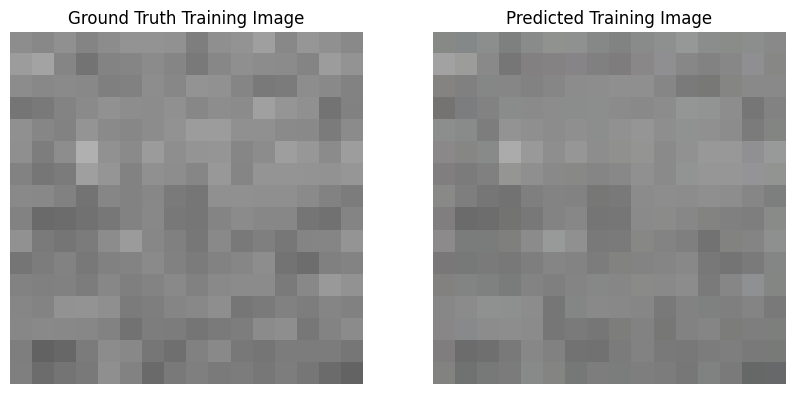

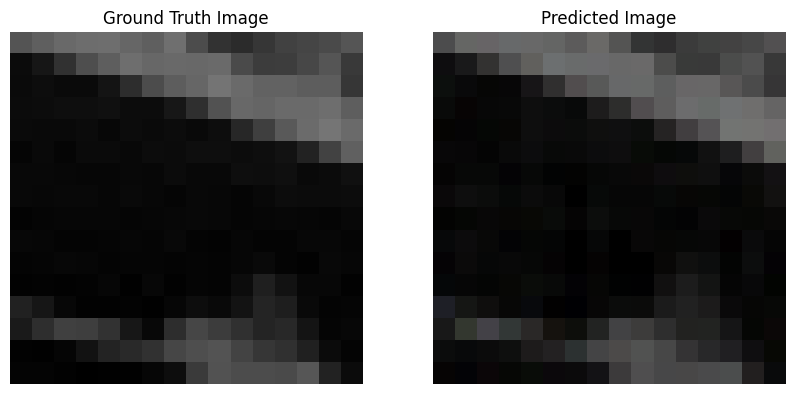

Epoch 51/150, Train Loss: 0.00014071565926769835, Validation Loss: 0.00015140100003918633


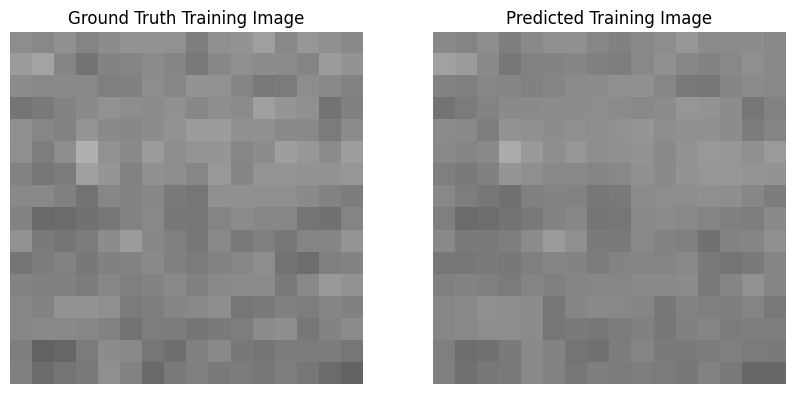

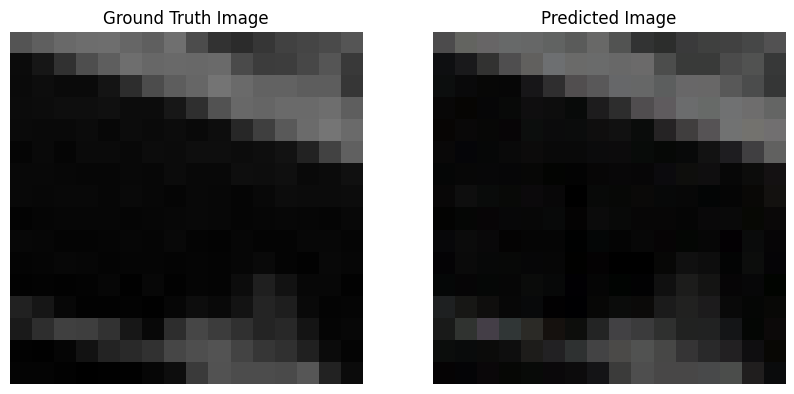

Epoch 61/150, Train Loss: 0.00013878008532515197, Validation Loss: 0.00014943970908135067


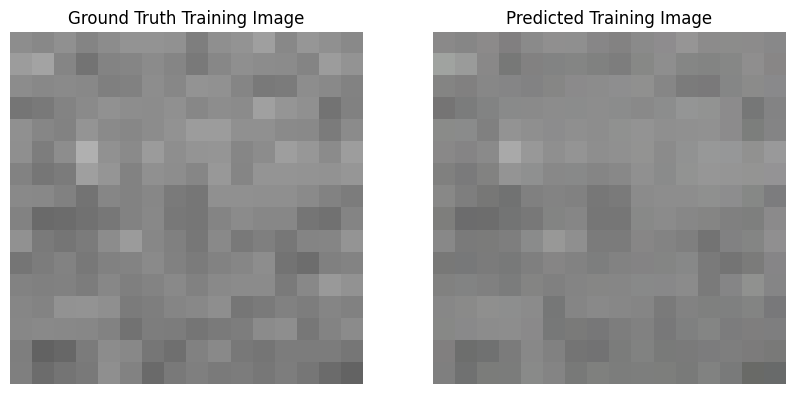

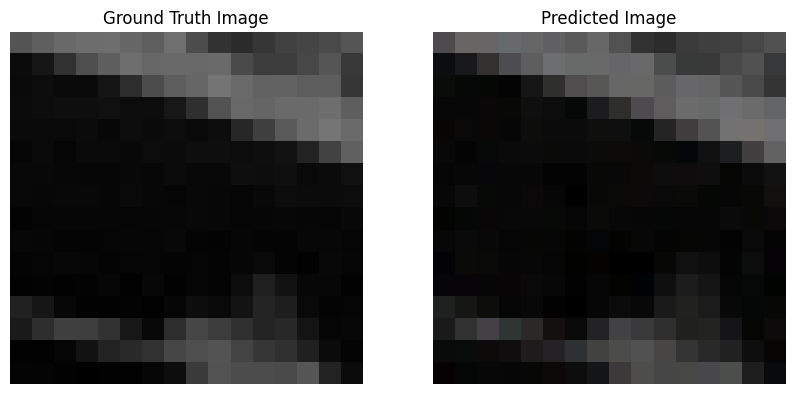

Epoch 71/150, Train Loss: 0.00013630525731684885, Validation Loss: 0.00015576350923968949


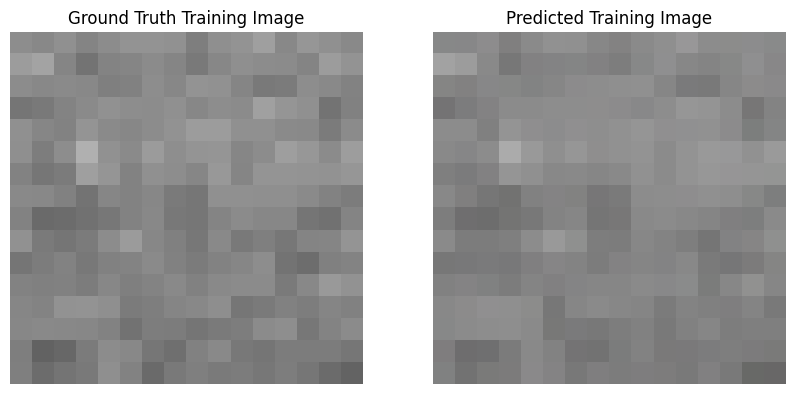

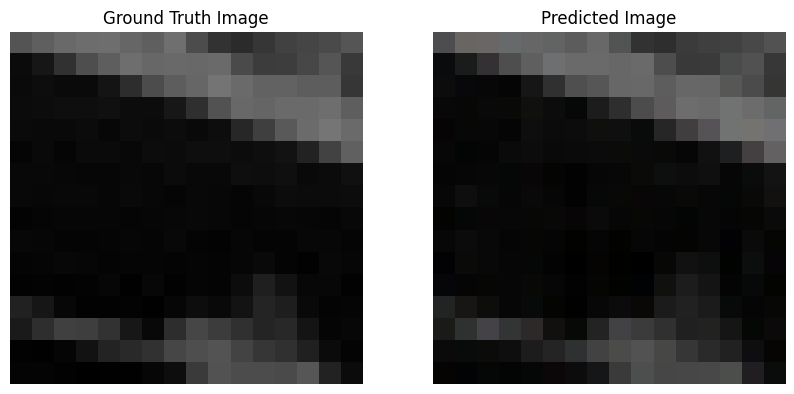

Epoch 81/150, Train Loss: 0.0001318450853403874, Validation Loss: 0.00014438885897036317


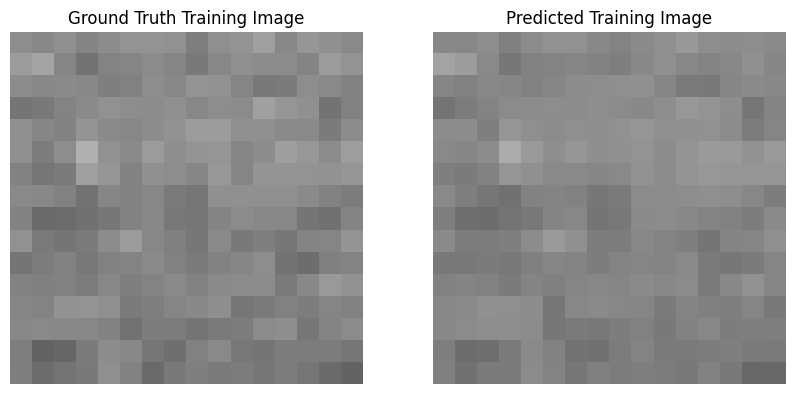

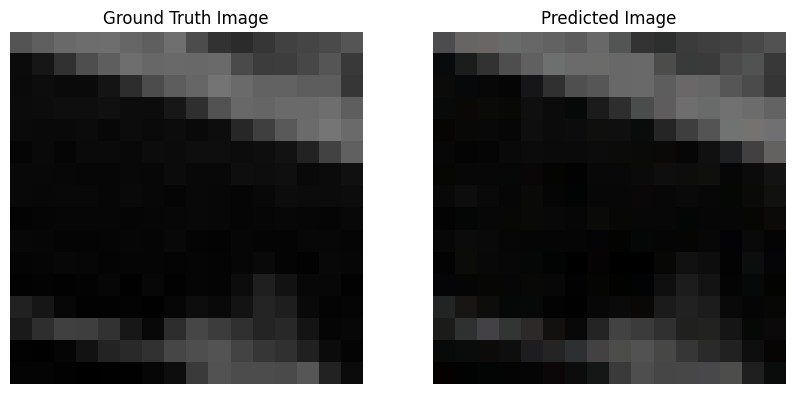

Epoch 91/150, Train Loss: 0.00013095964579861173, Validation Loss: 0.00014353076346982632


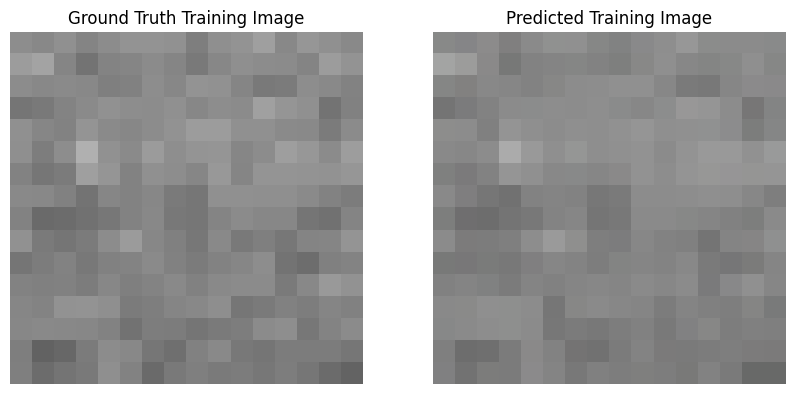

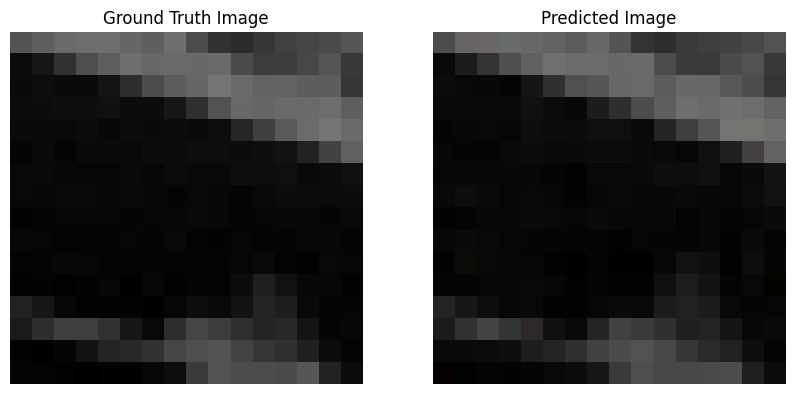

Epoch 101/150, Train Loss: 0.0001303866847365498, Validation Loss: 0.0001437632120197449


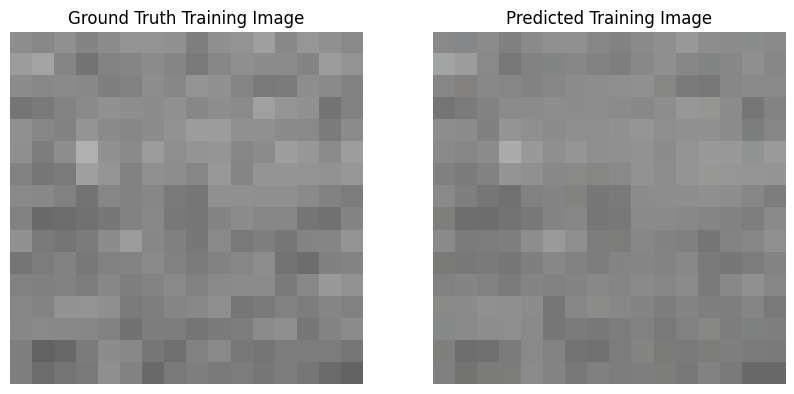

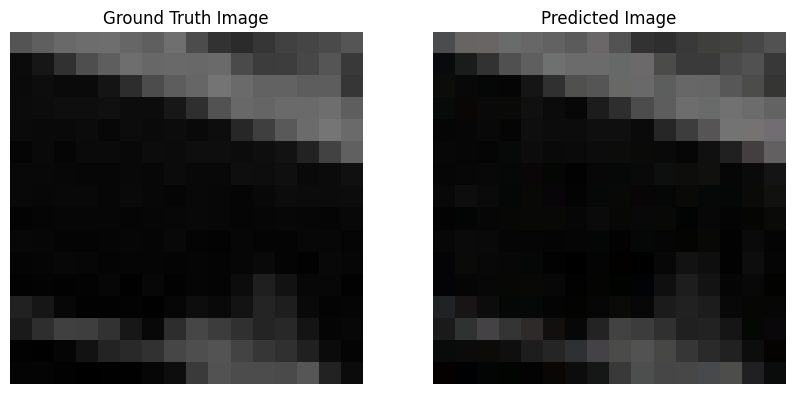

Epoch 111/150, Train Loss: 0.00012963646971400066, Validation Loss: 0.0001418298418781702


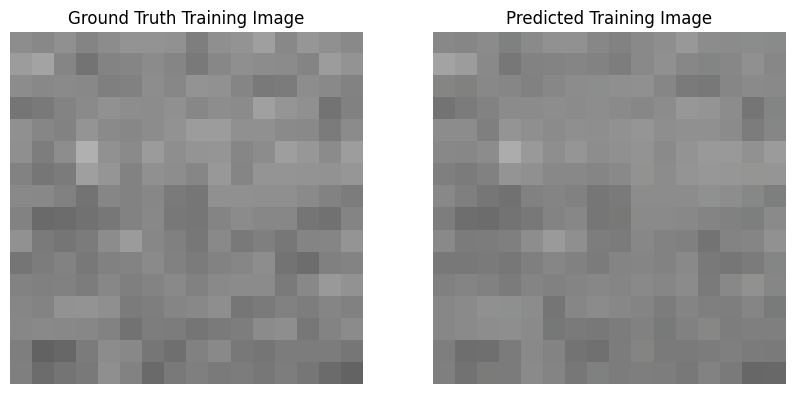

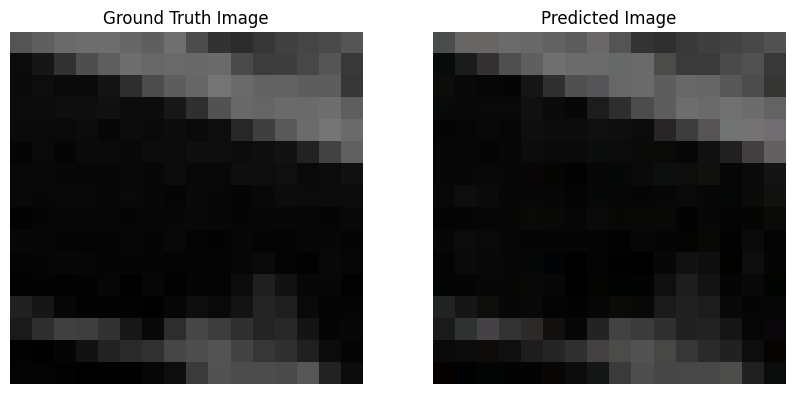

Epoch 121/150, Train Loss: 0.00012853168389028724, Validation Loss: 0.00014166156727440872


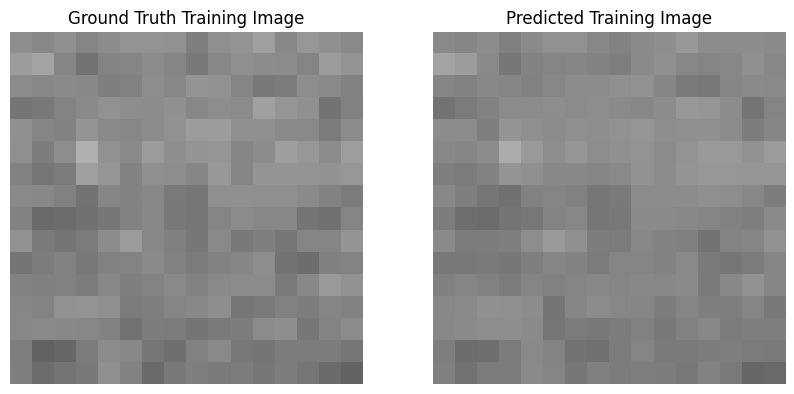

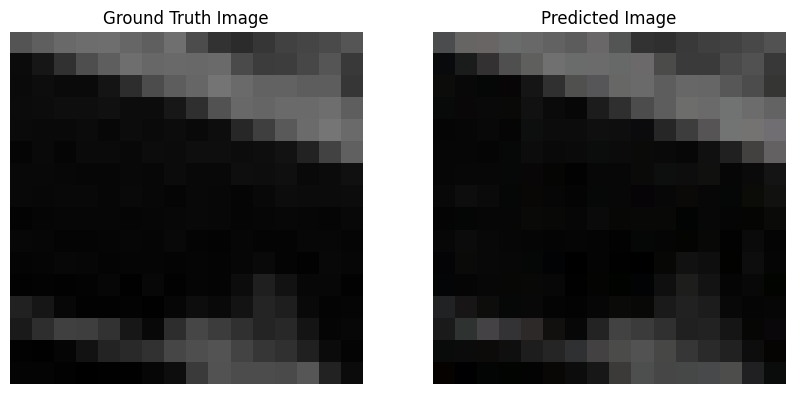

Epoch 131/150, Train Loss: 0.0001284526668626995, Validation Loss: 0.0001415286014095012


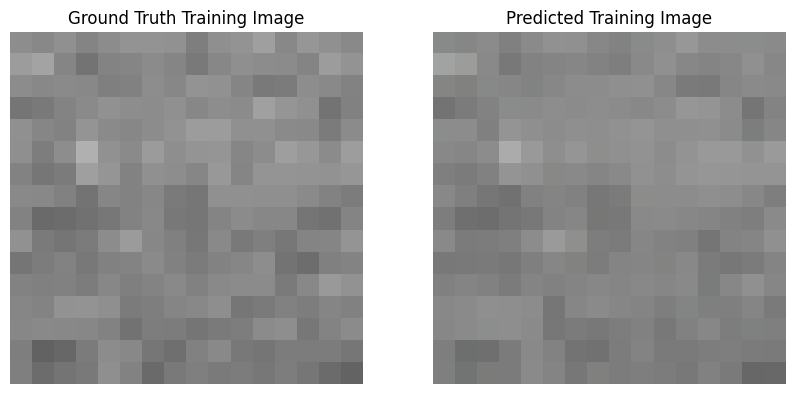

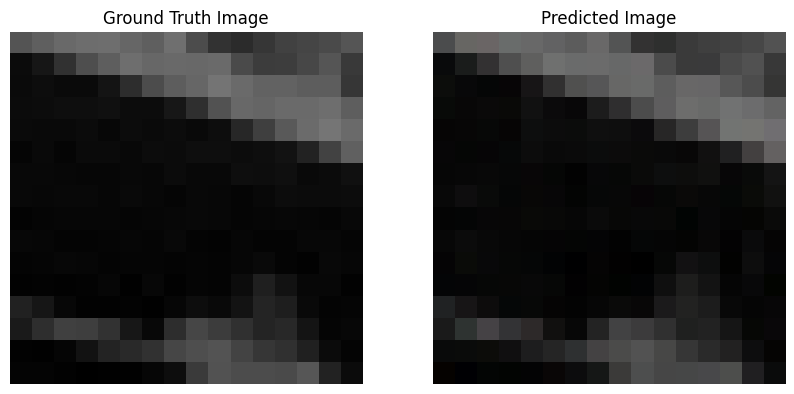

Epoch 141/150, Train Loss: 0.00012838024827033223, Validation Loss: 0.0001415259171462645
Epoch 150/150, Train Loss: 0.00012832145218055757, Validation Loss: 0.00014146971249290587


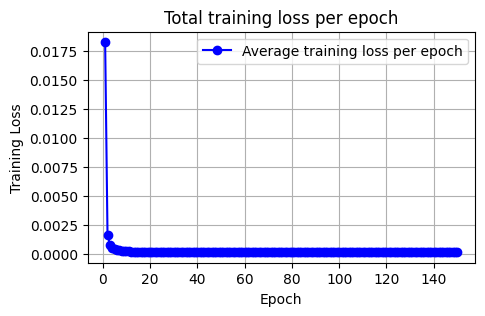

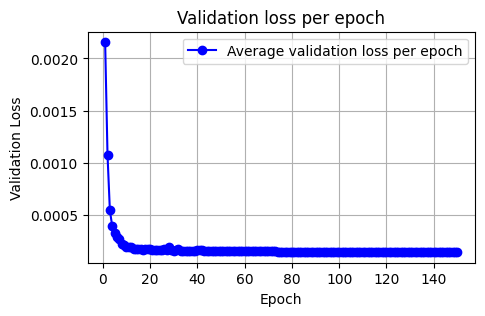

In [4]:
# Create an identity matrix for the dictionary (D)
height, width = normalised_size
num_pixels = 3 * height * width  # For RGB images
D = np.eye(num_pixels)

# Train the LISTA model
net = LISTA_train(
    X1, Y1, X2, Y2, D, numEpochs, numLayers,
    device, learning_rate, clear_train_dir, noisy_train_dir,
    noisy_valid_dir, clear_train_filenames, normalised_size
)

# Save the trained model

In [5]:
# Save the model
save_trained_model(net, numLayers, device, filepath='trained_lista_model_convolutional.pth')

print("Training and saving completed successfully.")


Model and parameters saved successfully.
Training and saving completed successfully.
